In [323]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
import cv2
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [302]:
path = os.listdir('dataset/training_set/')
classes = {'cats':0, 'dogs':1}

In [303]:
X=[]
Y=[]

for cls in classes:
    pth = 'dataset/training_set/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (150,150))
        X.append(img)
        Y.append(classes[cls])
        
X = np.array(X)
Y = np.array(Y)        

In [304]:
np.unique(Y)

array([0, 1])

In [305]:
#cant be multidimensional
pd.Series(Y).value_counts()


0    500
1    500
dtype: int64

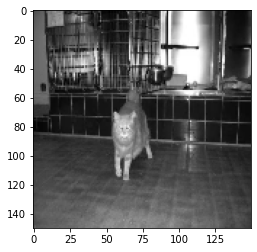

In [306]:
plt.imshow(X[77], cmap='gray')

In [307]:
print(X.shape)
X_updated = X.reshape(len(X), -1)
print(X_updated.shape)

(1000, 150, 150)
(1000, 22500)


In [326]:
#splitting data 
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=8,test_size=.0268)
xtrain.shape , xtest.shape  #must xtrain && xtest have same shapes(c,R)

((973, 22500), (27, 22500))

In [309]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0


In [310]:
#data scale from 0~255 to range(0,1) 
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

1.0 0.0
1.0 0.0


In [311]:

ytrain.shape

(973,)

In [313]:
xp_train=xtrain
xp_test=xtest

In [314]:
from sklearn.svm import SVC
classifier=SVC(C=0.5)
classifier.fit(xp_train, ytrain)

SVC(C=0.5)

In [315]:
print("Training Score:", classifier.score(xp_train, ytrain))
print("Testing Score:", classifier.score(xp_test, ytest))

Training Score: 0.8057553956834532
Testing Score: 0.8518518518518519


In [316]:
pred=classifier.predict(xp_test)
np.where(ytest!=pred)

(array([ 0,  3,  9, 20], dtype=int64),)

In [317]:
dec = {0:'cats', 1:'dogs'}

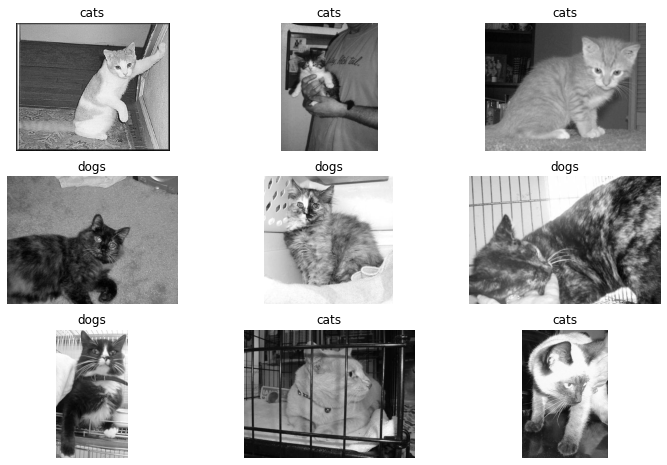

In [318]:
plt.figure(figsize=(12,8))
p = os.listdir('dataset/Test_set/')
c=1
for i in os.listdir('dataset/Test_set/cats/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('dataset/Test_set/cats/'+i,0)
    img1 = cv2.resize(img, (150,150))
    img1 = img1.reshape(1,-1)/255
    p = classifier.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

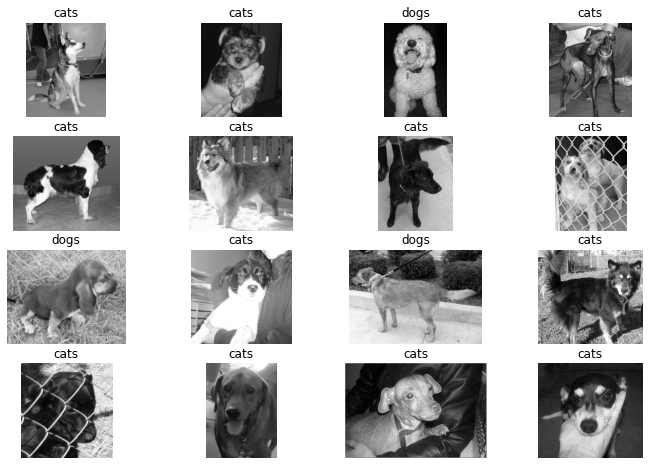

In [319]:
plt.figure(figsize=(12,8))
p = os.listdir('dataset/Test_set/')
c=1
for i in os.listdir('dataset/Test_set/dogs/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('dataset/Test_set/dogs/'+i,0)
    img1 = cv2.resize(img, (150,150))
    img1 = img1.reshape(1,-1)/255
    p = classifier.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

In [320]:
y_train_pred = classifier.decision_function(xp_train)    
y_test_pred = classifier.decision_function(xp_test)

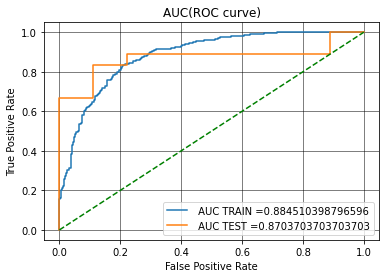

In [321]:
train_fpr, train_tpr, tr_thresholds = roc_curve(ytrain, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(ytest, y_test_pred)
plt.grid()
plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

<AxesSubplot:>

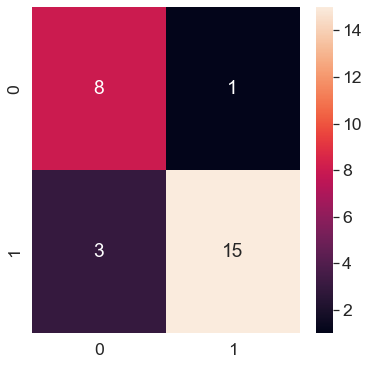

In [327]:
cm = confusion_matrix(ytest, pred)

fig, ax = plt.subplots(figsize=(6,6))      
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, ax=ax)